# UTSA CS 5233: Assignment-3

**LastName FirstName - abc123**

## Learning Objectives

Implement 2 different machine learning algorithms
*   Stochastic Gradient Descent
*   ID3 Decision Tree



## Description

This assignment is focused on **machine learning**, mainly on the implementation of 2 different algorithms - Stochastic Gradient Descent & ID3 decision tree. 
The assignment is divided into two sections, each for one unique ML algorithm. 

The base structure and comments are provided on what should be done. You can use some libraries that help support you for the successful completion of the assignment. However, you **CANNOT** use a complete library that contains the implementation of ML algorithms. You can get pieces of code from online, but please cite the source properly.


## Import Libraries

Write all the import statements here. This should be for both algorithm implmentations. As mentioned before, you can not use any premade ML libraries.

In [3]:
# import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

%matplotlib inline

In [4]:
customers = pd.read_csv('house_price_dataset (1).csv')
customers.head()

,X2 house age,X3 distance to the nearest station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"



# Stochastic Gradient Descent
(60 points)


In this section, you will implement the Stochastic Gradient Descent algorithm for a **regression** task.

'house_price_dataset.csv' is the data file that will be provided to you for the gradient descent algorithm implementation.

The first line contains the attribute names. All the other lines are different example instances to be used for the algorithm. Each column holds values of the attributes, whereas the last column holds the output value for that instance that your model should predict.




In [6]:
# read the data file
# create a normalized version of the original data which is what will be used by the algorithm
customers.describe()

,X2 house age,X3 distance to the nearest station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,17.736408,1087.579690,4.097087,24.969034,121.533357,37.860922
std,11.414149,1264.047654,2.947272,0.012432,0.015382,12.976599
min,0.000000,23.382840,0.000000,24.932070,121.473530,11.200000
25%,8.975000,289.324800,1.000000,24.963020,121.527600,27.700000
50%,16.150000,492.231300,4.000000,24.971100,121.538675,38.450000
75%,28.250000,1455.798000,6.000000,24.977583,121.543352,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,78.300000


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   X2 house age                        412 non-null    float64
 1   X3 distance to the nearest station  412 non-null    float64
 2   X4 number of convenience stores     412 non-null    int64  
 3   X5 latitude                         412 non-null    float64
 4   X6 longitude                        412 non-null    float64
 5   Y house price of unit area          412 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.4 KB


In [8]:
# Activation Function - implement Sigmoid
# given 'h' compute and return 'z' based on the activation function implemented
def activation_function(h):
    return 1/(1+math.exp(-h))


In [10]:
# Train the model using the given training dataset and the learning rate
# return the "weights" learnt for the perceptron - include the weight assocaited with bias as the last entry
# Make a prediction with weights
def predict(row, weights):
	activation = weights[0]
	for i in range(len(row)-1):
		activation += weights[i + 1] * row[i]
	return 1.0 if activation >= 0.0 else 0.0


In [11]:
# Test the model (weights learnt) using the given test dataset
# return the average error value
# Make a prediction with weights
def predict(row, weights):
	activation = weights[0]
	for i in range(len(row)-1):
		activation += weights[i + 1] * row[i]
	return 1.0 if activation >= 0.0 else 0.0

# test predictions
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
weights = [-0.1, 0.20653640140000007, -0.23418117710000003]
for row in dataset:
	prediction = predict(row, weights)
	print("Expected=%d, Predicted=%d" % (row[-1], prediction))

Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1


**Determine the best learning rate and plot the graph for training error vs learning rate**

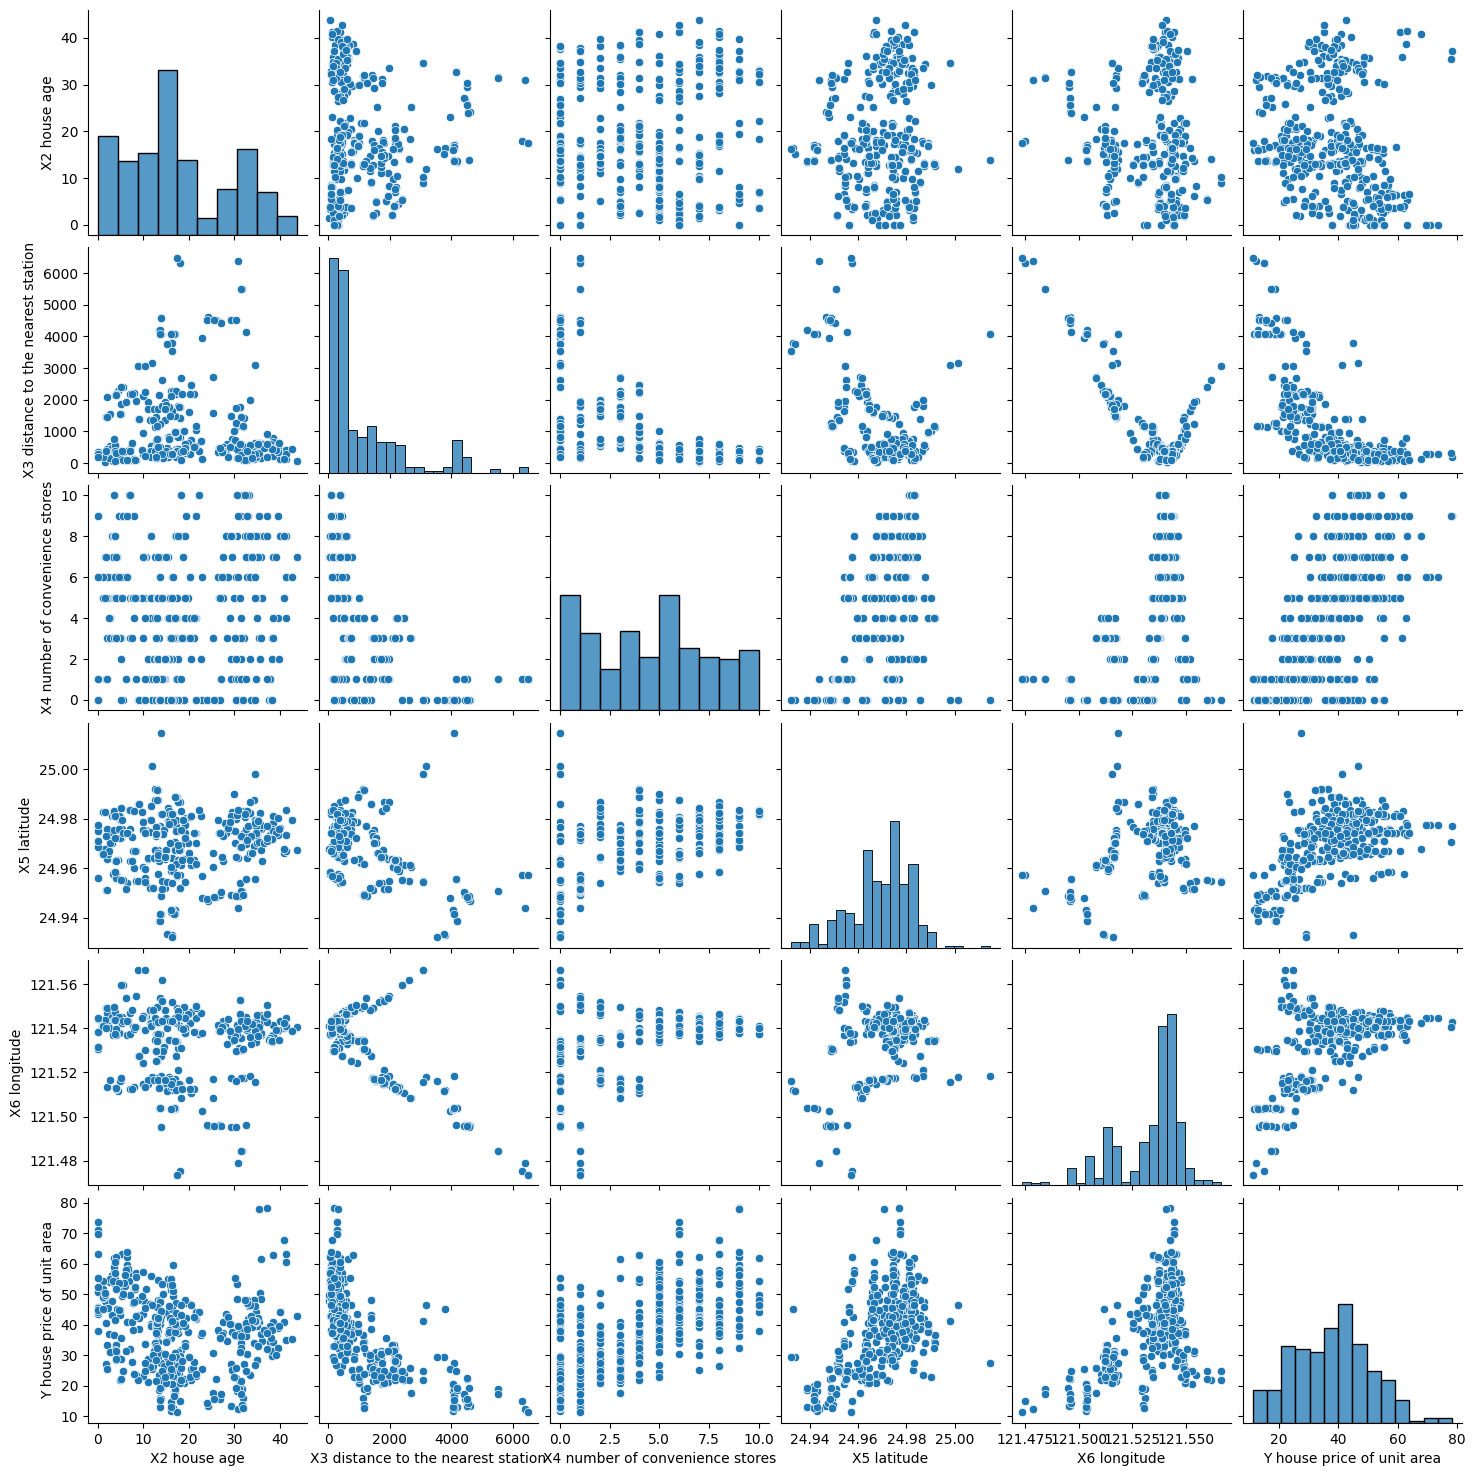

In [12]:
# Go through all possible learning rates from 0 to 1 in increments of 0.01
# For each learning rate
sns.pairplot(customers)


In [30]:
plt.savefig('output.jpg')

<Figure size 640x480 with 0 Axes>

**Split the dataset into two parts (train and test). Perform 20 iterations on the dataset to obtain the average errors and see how it changes with each iteration.**

In [15]:
# Split the entire dataset randomly into two different parts --
x = np.arange(20).reshape(-1, 1)
y = np.array([5, 12, 11, 19, 30, 29, 23, 40, 51, 54, 74,
                62, 68, 73, 89, 84, 89, 101, 99, 106])

# Use the "best_learning_rate" found above
# Start the weights = []
# Perform 20 iterations on the entire dataset and for each iteartion
x_train, x_test, y_train, y_test = train_test_split(
     x, y, test_size=8, random_state=0)

In [17]:
model = LinearRegression().fit(x_train, y_train)

model.intercept_


3.1617195496417523

In [18]:
model.coef_

array([5.53121801])

## Extra Credit - Accuracy Plots

(05 points)

Use the above accuracy results on the training and testing data and write code to plot the graphs as mentioned in the code block below.



In [28]:

# split again, and we should see the same split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# demonstrate that the train-test split procedure is repeatable
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
# create dataset
X, y = make_blobs(n_samples=100)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize first 5 rows
print(X_train[:5, :])
# split again, and we should see the same split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize first 5 rows
print(X_train[:5, :])

[[-3.74351293 -3.60317486]
 [-1.9542     -3.32991908]
 [-5.65551509  0.34762209]
 [-2.69278433 -3.13170276]
 [-3.76725312 -0.32335579]]
[[-3.74351293 -3.60317486]
 [-1.9542     -3.32991908]
 [-5.65551509  0.34762209]
 [-2.69278433 -3.13170276]
 [-3.76725312 -0.32335579]]


In [29]:
# split imbalanced dataset into train and test sets without stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X, y = make_classification(n_samples=100, weights=[0.94], flip_y=0, random_state=1)
print(Counter(y))
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
print(Counter(y_train))


Counter({0: 94, 1: 6})
Counter({0: 45, 1: 5})
Counter({0: 49, 1: 1})


In [33]:
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X, y = make_classification(n_samples=100, weights=[0.94], flip_y=0, random_state=1)
print(Counter(y))
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 94, 1: 6})
Counter({0: 47, 1: 3})
Counter({0: 47, 1: 3})


# ID3 Decision Tree
(90 points)

In this section, you will implement the ID3 Decision Tree algorithm. The training is for a **binary classification** task i.e. each instance will have a class value of 0 or 1. Also, assume that there are **no missing values** in the train or test data. 

Following are the data files that will be provided to you for the ID3 algorithm implementation.

*   Training file - 'id3-train.dat'
*   Testing file - 'id3-test.dat'

*Both these files should be present in the same folder as this code file.* In these files, only non-space characters are relevant. The first line contains the attribute names. All the other lines are example instances to be used for the algorithm. Each column holds values of the attributes, whereas the last column holds the class label for that instance.

In a decision tree, if you reach a leaf node but still have examples that belong to different classes, then choose the most frequent class (among the instances at the leaf node). If you reach a leaf node in the decision tree and have no examples left or the examples are equally split among multiple classes, then choose the class that is most frequent in the entire training set. You do not need to implement pruning. Also, don’t forget to use logarithm base 2 when computing entropy and set (0 log 0) to 0.

Write the code in the following code block, structure is provided. Instructions on the steps to follow are provided as comments. The code should output the following 3 things:

*   Print the Decision Tree created, in the following example format:

    ```
    attr1 = 0 :
        attr2 = 0 :
            attr3 = 0 : 1   --   15
            attr3 = 1 : 0   --   7
        attr3 = 1 :
            attr4 = 0 : 0   --   12
            attr4 = 1 : 1   --   6
    attr1 = 1 :
        attr2 = 1 : 1   --   9

    ```

*   Accuracy on the Training data = x %
*   Accuracy on the Test data = x %






In [35]:
# Pseudocode for the ID3 algorithm. Use this to create function(s).
# def ID3(data, root, attributesRemaining):
    # If you reach a leaf node in the decision tree and have no examples left or the examples are equally split among multiple classes
        # Choose and assign the class that is most frequent in the entire training set and return the updated tree
    # If all the instances have only one class label
        # Make this as the leaf node and use the label as the class value of the node and return the updated tree
    # If you reached a leaf node but still have examples that belong to different classes (there are no remaining attributes to be split)
        # Assign the most frequent class among the instances at the leaf node and return the updated tree
    # Find the best attribute to split by calculating the maximum information gain from the attributes remaining by calculating the entropy
    # Split the tree using the best attribute and recursively call the ID3 function using DFS to fill the sub-tree
    # return the root as the tree
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [38]:
# Create the decision tree by implementing the ID3 algorithm. Pseudocode provided above.
# Print the tree in the example format mentioned.

# Use the above created tree to predict the training data and print the accuracy as "Accuracy on the Training data = x %"
    # For each training instance, predict the output label
    # Compare it with the ground truth class label and calculate the accuracy accordingly
# Use the above created tree to predict the testing data and print the accuracy as "Accuracy on the Test data = x %"
    # For each testing instance, predict the output label
    # Compare it with the ground truth class label and calculate the accuracy accordingly
col_names = ['attr1',	'attr2',	'attr3',	'attr4',	'attr5',	'attr6', 'class'
]
# load dataset
pima = pd.read_csv("id3-test.dat", header=None, names=col_names)
pima.head()


,attr1,attr2,attr3,attr4,attr5,attr6,class
0,attr1\tattr2\tattr3\tattr4\tattr5\tattr6\tclass,NaN,NaN,NaN,NaN,NaN,NaN
1,1\t1\t1\t1\t0\t0\t0,NaN,NaN,NaN,NaN,NaN,NaN
2,0\t0\t0\t1\t0\t0\t0,NaN,NaN,NaN,NaN,NaN,NaN
3,0\t1\t1\t1\t0\t1\t1,NaN,NaN,NaN,NaN,NaN,NaN
4,0\t1\t1\t0\t1\t0\t1,NaN,NaN,NaN,NaN,NaN,NaN


## Extra Credit - Learning Curve

(05 points)

Instead of taking the entire training data (all 800 instances), loop through to select 'x' instances in the increments of 40 (i.e. 40, 80, 120, and so on). For each selected number 'x', randomly pick the example instances from the training data and call the ID3 function to create the decision tree. Calculate the accuracy of the created ID3 tree on the Test data file. Plot the corresponding graph, aka Learning Curve.


In [55]:
# Loop through to select the number of instances 'x' in increments of 40
# For each 'x',
    # Randomly select 'x' instances
    # Create the ID3 decision tree using those instances
    # Calculate the accuracy of the ID3 tree created on the Test data





# Plot the learning curve using the accuracy values
    # X-axis will be the number of training instances used for creating the tree
    # Y-axis will be the accuracy in % on the Test data
# # importing all the libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

#reading the data
data= pd.read_csv("house_price_dataset (1).csv")

#Investigating the data
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   X2 house age                        412 non-null    float64
 1   X3 distance to the nearest station  412 non-null    float64
 2   X4 number of convenience stores     412 non-null    int64  
 3   X5 latitude                         412 non-null    float64
 4   X6 longitude                        412 non-null    float64
 5   Y house price of unit area          412 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.4 KB
None


,X2 house age,X3 distance to the nearest station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


/var/folders/pj/nvg49rk125x7r5v260zyr4j00000gn/T/ipykernel_5071/3547363887.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


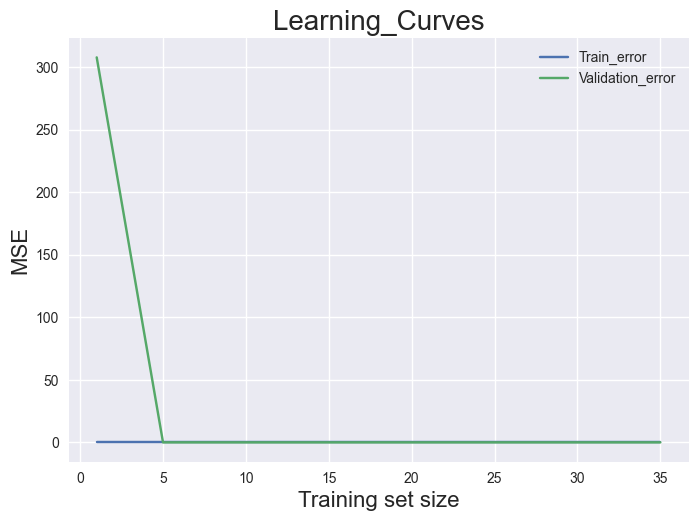

In [68]:
# As discussed here we are trying to vary the size of training set
train_size = [1, 5, 10, 15, 20, 25, 30, 35]
features = ['X2 house age','X3 distance to the nearest station','X4 number of convenience stores','X5 latitude','X6 longitude','Y house price of unit area']
target = 'X2 house age'
# estimating the training score & validation score
train_sizes, train_scores, validation_scores = learning_curve(estimator = LinearRegression(), X = data[features],y = data[target], train_sizes = train_size, cv = 5,scoring ='neg_mean_squared_error')

# Generating the Learning_Curve
train_scores_mean =-train_scores.mean(axis =1)
validation_scores_mean =-validation_scores.mean(axis =1)
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label ='Train_error')
plt.plot(train_sizes, validation_scores_mean, label ='Validation_error')
plt.ylabel('MSE', fontsize =16)
plt.xlabel('Training set size', fontsize =16)
plt.title('Learning_Curves', fontsize = 20, y =1)
plt.legend()



# Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Blackboard

## Rubric

*   (60 points) Gradient Descent Algorithm
*   (05 points) Extra Credit - GD Accuracy Plots
*   (90 points) ID3 Algorithm
*   (05 points) Extra Credit - ID3 Learning Curve



